In [326]:
import numpy as np
import pandas as pd

In [327]:
df = pd.read_csv("spam.csv", encoding='cp1252') # 

In [328]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5005,ham,Well its not like you actually called someone ...,NaN,NaN,NaN
5510,ham,Wait . I will msg after &lt;#&gt; min.,NaN,NaN,NaN
2023,ham,"Better than bb. If he wont use it, his wife wi...",NaN,NaN,NaN
3617,ham,"K, my roommate also wants a dubsack and anothe...",NaN,NaN,NaN
3712,ham,Aight do you still want to get money,NaN,NaN,NaN


In [329]:
df.shape

(5578, 5)

In [330]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5578 non-null   object
 1   v2          5578 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.0+ KB


In [332]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [333]:
df.sample(5)

,v1,v2
2692,ham,There r many model..sony ericson also der.. &l...
5510,ham,Wait . I will msg after &lt;#&gt; min.
3100,ham,Olol i printed out a forum post by a guy with ...
5266,ham,If anyone calls for a treadmill say you'll buy...
3960,ham,I knew it... U slept v late yest? Wake up so l...


In [334]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3763,ham,Lol no ouch but wish i'd stayed out a bit longer
5109,ham,In other news after hassling me to get him wee...
3134,ham,"Haha better late than ever, any way I could sw..."
4705,spam,WIN: We have a winner! Mr. T. Foley won an iPo...
1818,ham,\Getting tickets 4 walsall tue 6 th march. My ...


In [335]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [336]:
df['target'] = encoder.fit_transform(df['target'])

In [337]:
df.head()

,target,text
0,1,Hey Thanks a ton for signing up for Cutout.pro...
1,1,Dear SUBHADIP SINHA Congratulations for gettin...
2,0,"Go until jurong point, crazy.. Available only ..."
3,1,TRAINING Formats: Self Paced Program: Access t...
4,0,Ok lar... Joking wif u oni...


In [338]:
# null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [339]:
# check for duplicate values
df.duplicated().sum()

403

In [340]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [341]:
df.duplicated().sum()

0

In [342]:
df.shape

(5175, 2)

## 2.EDA

In [343]:
df.head()

,target,text
0,1,Hey Thanks a ton for signing up for Cutout.pro...
1,1,Dear SUBHADIP SINHA Congratulations for gettin...
2,0,"Go until jurong point, crazy.. Available only ..."
3,1,TRAINING Formats: Self Paced Program: Access t...
4,0,Ok lar... Joking wif u oni...


In [344]:
df['target'].value_counts()

target
0    4516
1     659
Name: count, dtype: int64

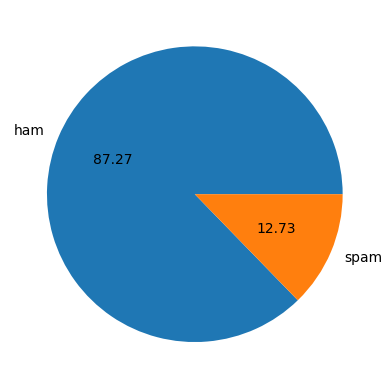

In [345]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [346]:
# Data is imbalanced

In [347]:
import nltk

In [348]:
# !pip install nltk

In [349]:
# nltk.download('punkt')

In [350]:
df['num_characters'] = df['text'].apply(len)

In [351]:
df.head()

,target,text,num_characters
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352
2,0,"Go until jurong point, crazy.. Available only ...",111
3,1,TRAINING Formats: Self Paced Program: Access t...,675
4,0,Ok lar... Joking wif u oni...,29


In [352]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [353]:
df.head()

,target,text,num_characters,num_words
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642,130
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352,57
2,0,"Go until jurong point, crazy.. Available only ...",111,24
3,1,TRAINING Formats: Self Paced Program: Access t...,675,119
4,0,Ok lar... Joking wif u oni...,29,8


In [354]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [355]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642,130,7
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352,57,3
2,0,"Go until jurong point, crazy.. Available only ...",111,24,2
3,1,TRAINING Formats: Self Paced Program: Access t...,675,119,8
4,0,Ok lar... Joking wif u oni...,29,8,2


In [356]:
df["target"].value_counts()

target
0    4516
1     659
Name: count, dtype: int64

In [357]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5175.000000,5175.000000,5175.000000
mean,79.607150,18.519227,1.967923
std,59.673756,13.505313,1.452021
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [358]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [359]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,659.000000,659.000000,659.000000
mean,140.754173,28.081942,2.980273
std,43.071655,8.934375,1.505180
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,675.000000,130.000000,9.000000


In [360]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

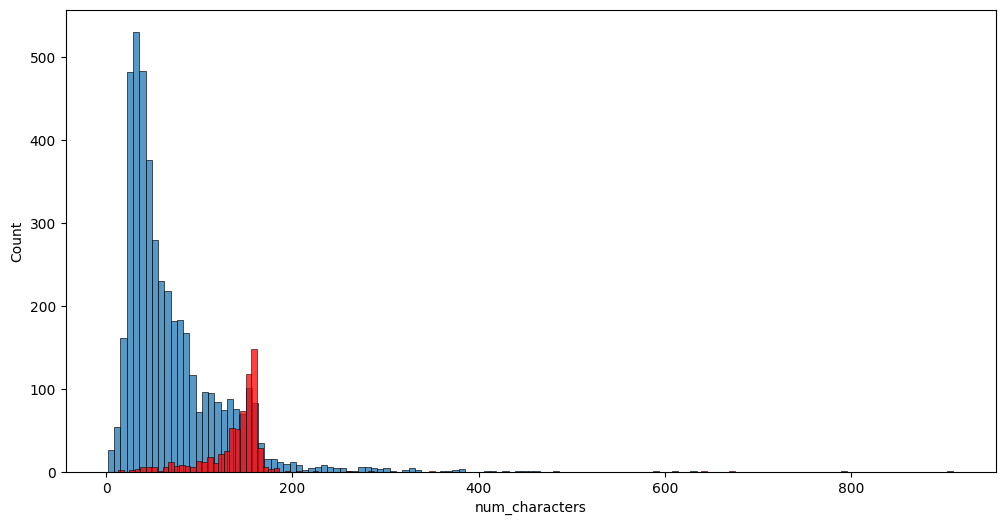

In [361]:
# g

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

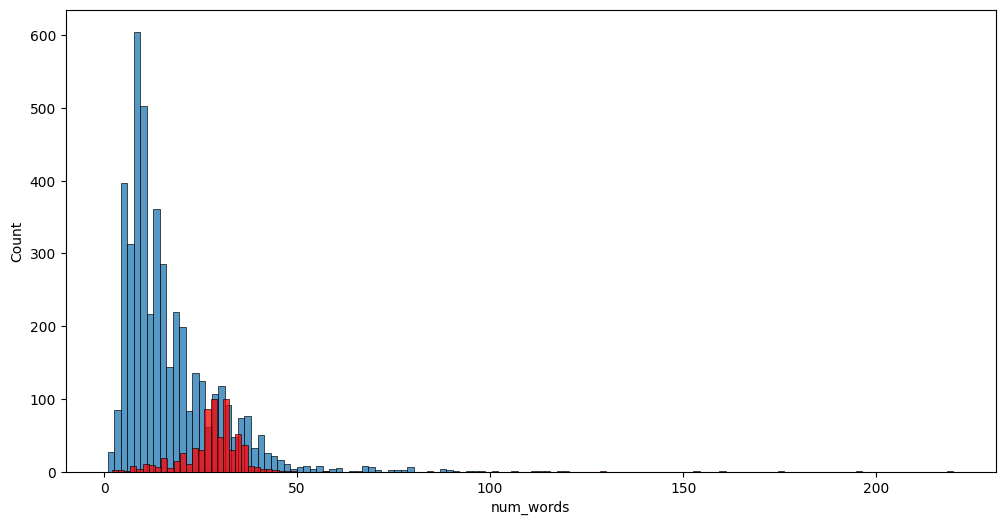

In [362]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

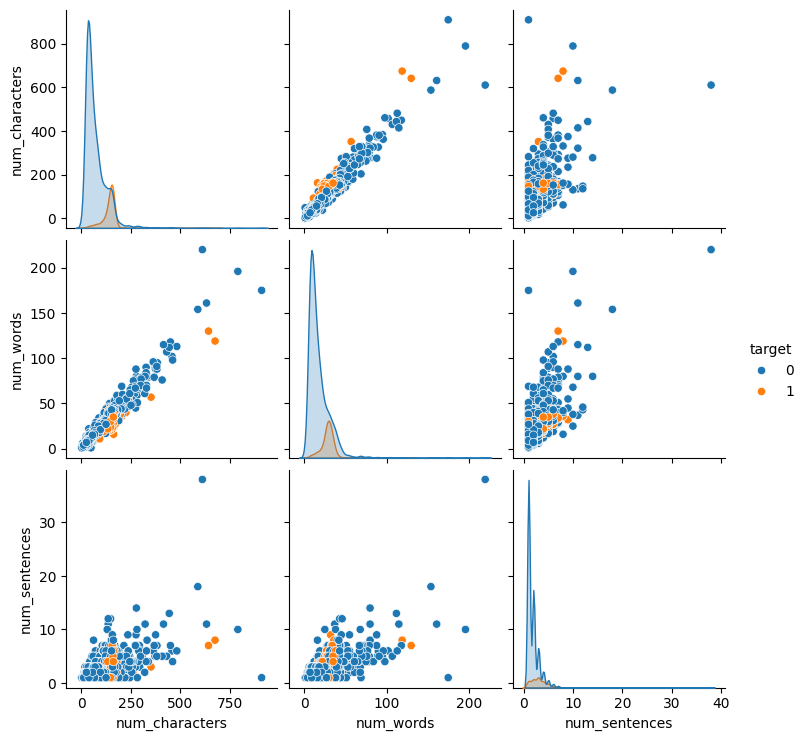

In [363]:
sns.pairplot(df,hue='target')

<Axes: >

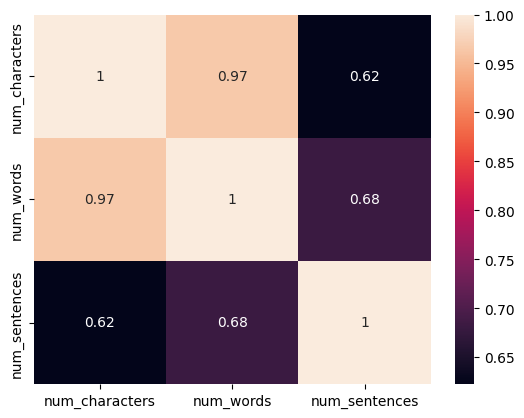

In [364]:
sns.heatmap(df.select_dtypes(include="int64").corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [365]:
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer

# import string
# ps=string.punctuation

# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
# 

In [366]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK data (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)  # Changed from nltk.word_tokenize to word_tokenize
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Test the function
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [367]:
df['text'][10]

"Nah I don't think he goes to usf, he lives around here though"

In [368]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [369]:
df['transformed_text'] = df['text'].apply(transform_text)

In [370]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642,130,7,hey thank ton sign question feedback feel free...
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352,57,3,dear subhadip sinha congratul get shortlist in...
2,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
3,1,TRAINING Formats: Self Paced Program: Access t...,675,119,8,train format self pace program access record c...
4,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [371]:
# !pip install wordcloud

In [372]:
# inoprtent word take boro kore dakhai

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [373]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

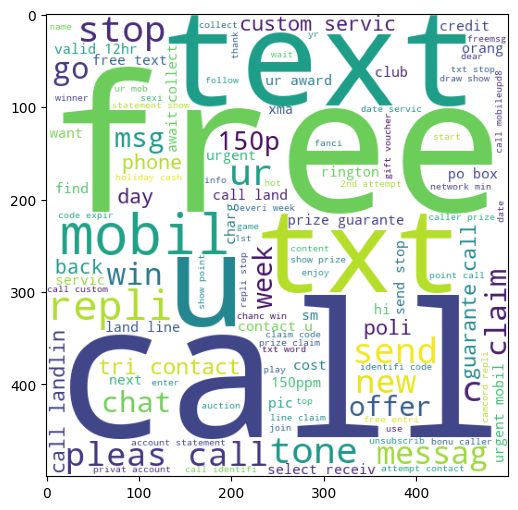

In [374]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [375]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

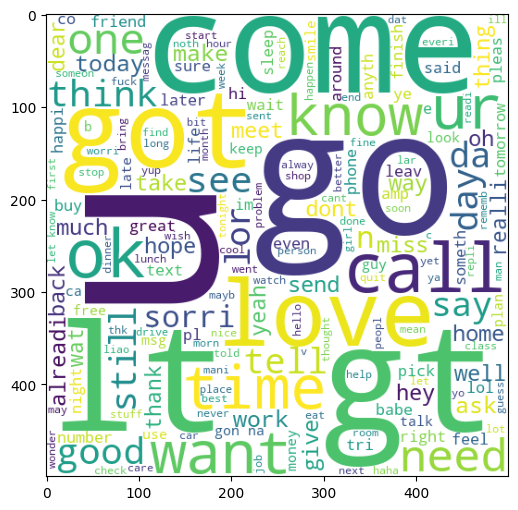

In [376]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [377]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642,130,7,hey thank ton sign question feedback feel free...
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352,57,3,dear subhadip sinha congratul get shortlist in...
2,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
3,1,TRAINING Formats: Self Paced Program: Access t...,675,119,8,train format self pace program access record c...
4,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [378]:
df[df['target'] == 1]['transformed_text'].tolist() 

['hey thank ton sign question feedback feel free ask also follow social media click button email inform tool like tool share social media invit link find page gift icon right sidebar 5 credit everi friend registr go dashboard find invit link amaz friend 5 credit account friend regist use link fun explor tool',
 'dear subhadip sinha congratul get shortlist internship august septemb batch mnc certif train internship program note batchmat miss receiv notif recipi allow send mail mandatori fill applic form internship',
 'train format self pace program access record class lm portal blend program access record class live doubt clear session everi weekend class live zoom class pm 2 3 day week record session avail lm portal access 6 month complet program student receiv program complet certif issu iit kharagpur kshitij internship certif wipro ibm microsoft meta adob etc letter recommend mnc access grow commun placement assist stipend upto 15000 base perform',
 'train format self pace program ac

In [379]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)
#print spam message

hey thank ton sign question feedback feel free ask also follow social media click button email inform tool like tool share social media invit link find page gift icon right sidebar 5 credit everi friend registr go dashboard find invit link amaz friend 5 credit account friend regist use link fun explor tool
dear subhadip sinha congratul get shortlist internship august septemb batch mnc certif train internship program note batchmat miss receiv notif recipi allow send mail mandatori fill applic form internship
train format self pace program access record class lm portal blend program access record class live doubt clear session everi weekend class live zoom class pm 2 3 day week record session avail lm portal access 6 month complet program student receiv program complet certif issu iit kharagpur kshitij internship certif wipro ibm microsoft meta adob etc letter recommend mnc access grow commun placement assist stipend upto 15000 base perform
train format self pace program access record cl

In [380]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [381]:
spam_corpus

['hey',
 'thank',
 'ton',
 'sign',
 'question',
 'feedback',
 'feel',
 'free',
 'ask',
 'also',
 'follow',
 'social',
 'media',
 'click',
 'button',
 'email',
 'inform',
 'tool',
 'like',
 'tool',
 'share',
 'social',
 'media',
 'invit',
 'link',
 'find',
 'page',
 'gift',
 'icon',
 'right',
 'sidebar',
 '5',
 'credit',
 'everi',
 'friend',
 'registr',
 'go',
 'dashboard',
 'find',
 'invit',
 'link',
 'amaz',
 'friend',
 '5',
 'credit',
 'account',
 'friend',
 'regist',
 'use',
 'link',
 'fun',
 'explor',
 'tool',
 'dear',
 'subhadip',
 'sinha',
 'congratul',
 'get',
 'shortlist',
 'internship',
 'august',
 'septemb',
 'batch',
 'mnc',
 'certif',
 'train',
 'internship',
 'program',
 'note',
 'batchmat',
 'miss',
 'receiv',
 'notif',
 'recipi',
 'allow',
 'send',
 'mail',
 'mandatori',
 'fill',
 'applic',
 'form',
 'internship',
 'train',
 'format',
 'self',
 'pace',
 'program',
 'access',
 'record',
 'class',
 'lm',
 'portal',
 'blend',
 'program',
 'access',
 'record',
 'class',
 'li

In [382]:
len(spam_corpus)

10162

In [383]:
from collections import Counter
Counter(spam_corpus).most_common(30)   # most common 30 spm word

[('call', 320),
 ('free', 192),
 ('2', 157),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 75),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('week', 51),
 ('cash', 51),
 ('pleas', 51),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [384]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

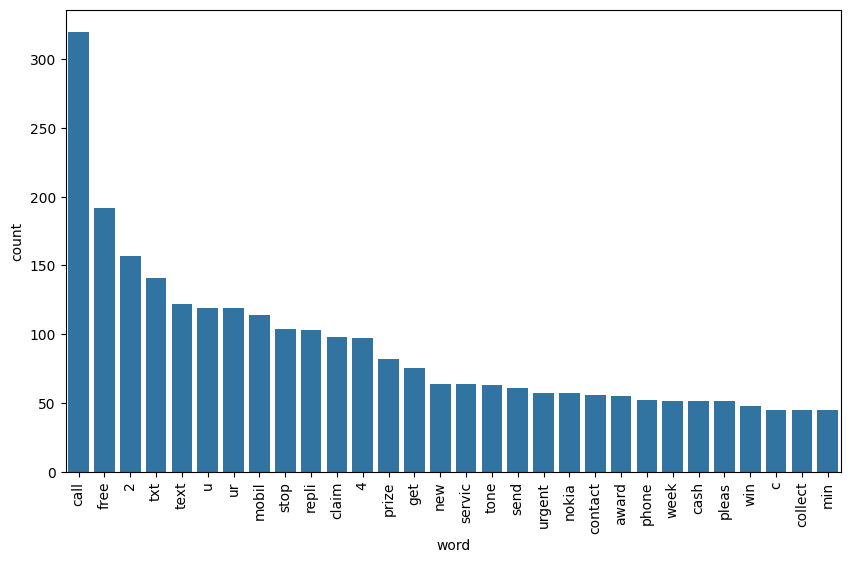

In [385]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the Counter
top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_30, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [386]:
df[df['target'] == 0]['transformed_text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp 

In [387]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [388]:
ham_corpus # all ham

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [389]:
len(ham_corpus)

35305

In [390]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

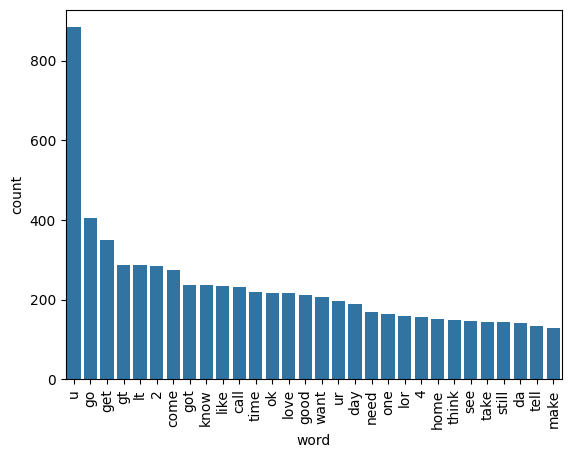

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(data=top_30, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [392]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Hey Thanks a ton for signing up for Cutout.pro...,642,130,7,hey thank ton sign question feedback feel free...
1,1,Dear SUBHADIP SINHA Congratulations for gettin...,352,57,3,dear subhadip sinha congratul get shortlist in...
2,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
3,1,TRAINING Formats: Self Paced Program: Access t...,675,119,8,train format self pace program access record c...
4,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [393]:
x=df[["transformed_text"]]
y=df["target"]

In [394]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
x,y=ran.fit_resample(x,y)

In [395]:
x

,transformed_text
0,hey thank ton sign question feedback feel free...
1,dear subhadip sinha congratul get shortlist in...
2,go jurong point crazi avail bugi n great world...
3,train format self pace program access record c...
4,ok lar joke wif u oni
...,...
9027,hi ya babe x u 4goten bout scammer get smart t...
9028,warner villag 83118 c colin farrel swat wkend ...
9029,get offici england poli rington colour flag ye...
9030,wml c


In [396]:
y.value_counts()

target
1    4516
0    4516
Name: count, dtype: int64

## 4. Model Building

In [397]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [398]:
X = tfidf.fit_transform(x["transformed_text"]).toarray()

In [399]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [400]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [401]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [402]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [403]:
X.shape

(9032, 3000)

In [404]:
from sklearn.model_selection import train_test_split

In [405]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [406]:
y_train.shape

(7225,)

In [407]:
# sns.barplot(y)

In [408]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [409]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [410]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9900387382401771
[[883  12]
 [  6 906]]
0.9869281045751634


In [411]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9717764250138351
[[871  24]
 [ 27 885]]
0.9735973597359736


In [412]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.981737686773658
[[893   2]
 [ 31 881]]
0.9977349943374858


In [413]:
# tfidf --> MNB

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [415]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [416]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [417]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [418]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9822910902047592, 0.9824561403508771)

In [419]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)


    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9822910902047592
Precision -  0.9824561403508771
For  KN
Accuracy -  0.9690094078583287
Precision -  1.0
For  NB
Accuracy -  0.9717764250138351
Precision -  0.9735973597359736
For  DT
Accuracy -  0.8710570005534034
Precision -  0.9238451935081149
For  LR
Accuracy -  0.9739900387382402
Precision -  0.9695982627578719
For  RF
Accuracy -  0.9977863862755949
Precision -  0.9956331877729258
For  AdaBoost
Accuracy -  0.8677365799667958
Precision -  0.9211514392991239
For  BgC
Accuracy -  0.9667957941339236
Precision -  0.9382716049382716
For  ETC
Accuracy -  0.9988931931377975
Precision -  0.9978118161925602
For  GBDT
Accuracy -  0.9192030990592142
Precision -  0.9362186788154897
For  xgb
Accuracy -  0.965688987271721
Precision -  0.9680616740088106


In [420]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [421]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.969009,1.000000
8,ETC,0.998893,0.997812
5,RF,0.997786,0.995633
0,SVC,0.982291,0.982456
2,NB,0.971776,0.973597
4,LR,0.973990,0.969598
10,xgb,0.965689,0.968062
7,BgC,0.966796,0.938272
9,GBDT,0.919203,0.936219
3,DT,0.871057,0.923845


In [422]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [423]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.969009
1,ETC,Accuracy,0.998893
2,RF,Accuracy,0.997786
3,SVC,Accuracy,0.982291
4,NB,Accuracy,0.971776
5,LR,Accuracy,0.973990
6,xgb,Accuracy,0.965689
7,BgC,Accuracy,0.966796
8,GBDT,Accuracy,0.919203
9,DT,Accuracy,0.871057


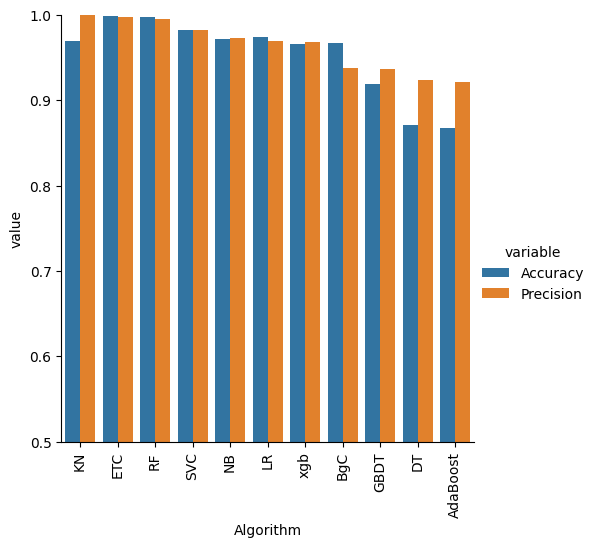

In [424]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [425]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [426]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [427]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [428]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [429]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [430]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [431]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.969009,1.000000,0.969009,1.000000,0.969009,1.000000,0.969009,1.000000
1,ETC,0.998893,0.997812,0.998893,0.997812,0.998893,0.997812,0.998893,0.997812
2,RF,0.997786,0.995633,0.997786,0.995633,0.997786,0.995633,0.997786,0.995633
3,SVC,0.982291,0.982456,0.982291,0.982456,0.982291,0.982456,0.982291,0.982456
4,NB,0.971776,0.973597,0.971776,0.973597,0.971776,0.973597,0.971776,0.973597
5,LR,0.973990,0.969598,0.973990,0.969598,0.973990,0.969598,0.973990,0.969598
6,xgb,0.965689,0.968062,0.965689,0.968062,0.965689,0.968062,0.965689,0.968062
7,BgC,0.966796,0.938272,0.966796,0.938272,0.966796,0.938272,0.966796,0.938272
8,GBDT,0.919203,0.936219,0.919203,0.936219,0.919203,0.936219,0.919203,0.936219
9,DT,0.871057,0.923845,0.871057,0.923845,0.871057,0.923845,0.871057,0.923845


In [432]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [433]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [434]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [435]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9872717210846708
Precision 0.988998899889989


In [436]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [437]:
from sklearn.ensemble import StackingClassifier

In [438]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [439]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9988931931377975
Precision 0.9978118161925602


In [443]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(knc,open('model.pkl','wb'))